In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_pop_dens = pd.read_csv('data_shp.csv')

In [4]:
df_empd02 = pd.read_csv('empd02.csv')

In [5]:
df_empd15 = pd.read_csv('empd15.csv')

In [6]:
df_tod = pd.read_csv('TOD.csv')

In [65]:
df_aram = pd.read_stata("UDP_NYC_Variables.dta")

In [9]:
df_aram.columns

Index(['GEOid2', 'hh16', 'moe_hh16', 'per_col00', 'per_nonwhite00',
       'per_rent00', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000',
       'vhi2000', 'per_all_li00', 'hh00', 'all_li_count00', 'per_nonwhite90',
       'per_rent90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990',
       'vhi1990', 'denominator', 'per_all_li90', 'all_li_count90', 'pop00',
       'pop16', 'moe_pop16', 'ch_all_li_count90_00', 'ch_all_li_count00_16',
       'moveinincd16', 'co_med_indinc16', 'per_limove16', 'per_limove09',
       'TOD', 'empd15', 'mrent90', 'rou90', 'mrent00', 'rou00', 'mrent16',
       'moe_mrent16', 'mhval90', 'ohu90', 'mhval00', 'ohu00', 'mhval16',
       'moe_mhval16', 'mhval90_00', 'mhval00_16', 'mrent90_00', 'mrent00_16',
       'hu16', 'per_units_pre50', 'ohu16', 'moe_owner16', 'rhu16',
       'moe_renter16', 'per_rent16', 'per_nonwhite16', 'vli2016', 'li2016',
       'mi2016', 'hmi2016', 'hi2016', 'vhi2016', 'per_all_li16',
       'all_li_count16', 'ag25up', 'bachelors',

In [10]:
df_ct_90 = pd.read_csv('09_1990_variables.csv')

In [11]:
df_ct_00 = pd.read_csv('09_2000_variables.csv')

In [12]:
df_ct_10 = pd.read_csv('09_2010_variables.csv')

In [13]:
df_ct_16 = pd.read_csv('09_2016_variables.csv')

In [14]:
df_ny_90 = pd.read_csv('36_1990_variables.csv')

In [15]:
df_ny_00 = pd.read_csv('36_2000_variables.csv')

In [16]:
df_ny_10 = pd.read_csv('36_2010_variables.csv')

In [17]:
df_ny_16 = pd.read_csv('36_2016_variables.csv')

In [18]:
df_nj_90 = pd.read_csv('34_1990_variables.csv')

In [19]:
df_nj_10 = pd.read_csv('34_2010_variables.csv')

In [20]:
df_nj_00 = pd.read_csv('34_2000_variables.csv')

In [21]:
df_nj_16 = pd.read_csv('34_2016_variables.csv')

#### Merging data sets

In [22]:
df_pop_dens = df_pop_dens.set_index('GEOID')

In [23]:
df_ct_90 = df_ct_90.set_index('GEOid2')
df_ct_00 = df_ct_00.set_index('GEOid2')
df_ct_10 = df_ct_10.set_index('GEOid2')
df_ct_16 = df_ct_16.set_index('GEOid2')

In [24]:
df_nj_90 = df_nj_90.set_index('GEOid2')
df_nj_00 = df_nj_00.set_index('GEOid2')
df_nj_10 = df_nj_10.set_index('GEOid2')
df_nj_16 = df_nj_16.set_index('GEOid2')

In [25]:
df_ny_90 = df_ny_90.set_index('GEOid2')
df_ny_00 = df_ny_00.set_index('GEOid2')
df_ny_10 = df_ny_10.set_index('GEOid2')
df_ny_16 = df_ny_16.set_index('GEOid2')

In [26]:
df_ct_90 = df_ct_90.drop(columns=['state','county','tract'])
df_ct_00 = df_ct_00.drop(columns=['state','county','tract'])
df_ct_10 = df_ct_10.drop(columns=['state','county','tract'])

In [27]:
df_nj_90 = df_nj_90.drop(columns=['state','county','tract'])
df_nj_00 = df_nj_00.drop(columns=['state','county','tract'])
df_nj_10 = df_nj_10.drop(columns=['state','county','tract'])

In [28]:
df_ny_90 = df_ny_90.drop(columns=['state','county','tract'])
df_ny_00 = df_ny_00.drop(columns=['state','county','tract'])
df_ny_10 = df_ny_10.drop(columns=['state','county','tract'])

In [29]:
df_ct = df_ct_90.merge(df_ct_00, on = 'GEOid2')

In [30]:
df_ct = df_ct.merge(df_ct_10, on = 'GEOid2')

In [31]:
df_ct = df_ct.merge(df_ct_16, on = 'GEOid2')

In [32]:
df_ny = df_ny_90.merge(df_ny_00, on = 'GEOid2')

In [33]:
df_ny = df_ny.merge(df_ny_10, on = 'GEOid2')

In [34]:
df_ny = df_ny.merge(df_ny_16, on = 'GEOid2')

In [35]:
df_nj = df_nj_90.merge(df_nj_00, on = 'GEOid2')

In [36]:
df_nj = df_nj.merge(df_nj_10, on = 'GEOid2')

In [37]:
df_nj = df_nj.merge(df_nj_16, on = 'GEOid2')

In [38]:
df_ct['hi_mig_16'] = 0
df_ct['vhi_mig_16'] = 0
df_ct['hi_mig_16_moe'] = 0
df_ct['vhi_mig_16_moe'] = 0
df_ct['hi_mig_10'] = 0
df_ct['vhi_mig_10'] = 0
df_ct['hi_mig_10_moe'] = 0
df_ct['vhi_mig_10_moe'] = 0

In [39]:
df_ny = df_ny.sort_index(axis=1)
df_ct = df_ct.sort_index(axis=1)
df_nj = df_nj.sort_index(axis=1)

In [40]:
data = pd.concat([df_nj, df_ny, df_ct], axis=0)

In [41]:
len(df_ny)

3829

In [42]:
len(df_ct)

714

In [43]:
len(df_nj)

1425

In [44]:
len(data)

5968

In [45]:
len(df_aram)

5306

In [66]:
df_aram.columns=['GEOid2', 'hh_16', 'hh_16_moe', 'per_col_00', 'per_nonwhite_00',
       'per_rent_00', 'vli_00', 'li_00', 'mi_00', 'hmi_00', 'hi_00',
       'vhi_00', 'per_all_li_00', 'hh_00', 'all_li_count_00', 'per_nonwhite_90',
       'per_rent_90', 'vli_90', 'li_90', 'mi_90', 'hmi_90', 'hi_90',
       'vhi_90', 'denominator', 'per_all_li_90', 'all_li_count_90', 'pop_00',
       'pop_16', 'pop_16_moe', 'ch_all_li_count_90_00', 'ch_all_li_count_00_16',
       'moveinincd_16', 'co_med_indinc_16', 'per_limove_16', 'per_limove_09',
       'TOD', 'empd_15', 'mrent_90', 'rou_90', 'mrent_00', 'rou_00', 'mrent_16',
       'mrent_16_moe', 'mhval_90', 'ohu_90', 'mhval_00', 'ohu_00', 'mhval_16',
       'mhval_16_moe', 'mhval_90_00', 'mhval_00_16', 'mrent_90_00', 'mrent_00_16',
       'hu_16', 'per_units_pre50', 'ohu_16', 'moe_owner_16', 'rhu_16',
       'renter_16_moe', 'per_rent_16', 'per_nonwhite_16', 'vli_16', 'li_16',
       'mi_16', 'hmi_16', 'hi_16', 'vhi_16', 'per_all_li_16',
       'all_li_count_16', 'ag25up', 'bachelors', 'moe_bachelors', 'masters',
       'moe_masters', 'professional', 'moe_professionals', 'doctorate',
       'moe_doctorates', 'per_col_16', 'pop_90', 'per_col_90', 'moe_hu_16',
       'hinc_16', 'moe_hinc_16', 'popgrowth']

In [71]:
df_aram['GEOid2'] = df_aram.GEOid2.apply(lambda x: int(x))

In [72]:
df_aram = df_aram.set_index('GEOid2')

In [78]:
df_aram.tail()

,hh_16,hh_16_moe,per_col_00,per_nonwhite_00,per_rent_00,vli_00,li_00,mi_00,hmi_00,hi_00,...,moe_professionals,doctorate,moe_doctorates,per_col_16,pop_90,per_col_90,moe_hu_16,hinc_16,moe_hinc_16,popgrowth
GEOid2,,,,,,,,,,,,,,,,,,,,,
36119981000,286.0,70.0,0.266195,0.524826,0.893204,0.655472,0.240851,3.734112e-02,0.026111,0.021194,...,89.0,0.0,11.0,0.278102,2835.041504,0.209298,68.0,57353.0,19091.0,-516.0
36119982000,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,0.0,11.0,0.030790,NaN,NaN,11.0,NaN,NaN,NaN
36119983000,0.0,11.0,0.404343,0.265601,0.360562,0.194520,0.126942,7.533091e-02,0.086844,0.089576,...,11.0,0.0,11.0,0.091803,1194.203003,0.050719,11.0,NaN,NaN,-58.0
36119984000,92.0,37.0,0.121495,0.517544,0.000000,0.220431,0.394953,-1.490116e-08,0.019975,0.293456,...,6.0,7.0,9.0,0.208000,749.000000,0.255689,48.0,38929.0,16474.0,-54.0
36119985000,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,0.0,11.0,0.681818,NaN,NaN,11.0,NaN,NaN,NaN


In [80]:
data = data.merge(df_aram, on='GEOid2', how='outer')

In [42]:
#data = data.dropna(axis = 0, how = 'any')

In [43]:
#data = data.merge(df_pop_dens[['pop_density16']], left_index = True, right_index = True)

In [44]:
#data['pop_density16_norm'] = data.pop_density16 / np.max(data.pop_density16)

#### Adding downtown dummy variable

In [81]:
downtown = [5, 47, 59, 81, 85, 119, 13, 17, 31, 39, 1, 9]

In [82]:
data['downtown'] = data.county.apply(lambda x: x in downtown)

In [83]:
df_tod = df_tod.set_index('GEOID')

In [48]:
#df_aram = df_aram.set_index('GEOid2')

In [84]:
df_empd15 = df_empd15.set_index('GEOid2')
df_empd02 = df_empd02.set_index('GEOid2')

In [85]:
data = data.merge(df_empd15, left_index = True, right_index = True)
data = data.merge(df_empd02, left_index = True, right_index = True)

In [86]:
len(data)

7065

In [87]:
data = data.merge(df_tod[['TOD','TOD_pre_00','TOD_00_10','TOD_10']],left_index=True, right_index=True)

In [90]:
data = data.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])

In [54]:
columns = data.columns

In [55]:
for i in range(1,len(columns)):
    print(columns[i], np.isnan(data.iloc[:,i].values).sum())

county 0
hh_00 0
hh_16 0
hh_16_moe 0
hh_90 0
hi_00 0
hi_16 1
hi_16_moe 0
hi_90 0
hi_mig_10 0
hi_mig_10_moe 0
hi_mig_16 0
hi_mig_16_moe 0
hinc_00 0
hinc_16 0
hinc_16_moe 0
hinc_90 0
hu_00 0
hu_16 0
hu_16_moe 0
hu_90 0
li_00 0
li_16 1
li_16_moe 0
li_90 0
li_mig_10 0
li_mig_10_moe 0
li_mig_16 0
li_mig_16_moe 0
mhi_00 0
mhi_16 1
mhi_16_moe 0
mhi_90 0
mhi_mig_10 0
mhi_mig_10_moe 0
mhi_mig_16 0
mhi_mig_16_moe 0
mhval_00 0
mhval_16 0
mhval_16_moe 0
mhval_90 0
mi_00 0
mi_16 1
mi_16_moe 0
mi_90 0
mi_mig_10 0
mi_mig_10_moe 0
mi_mig_16 0
mi_mig_16_moe 0
mrent_00 0
mrent_16 0
mrent_16_moe 0
mrent_90 0
per_all_li_mig_10 0
per_all_li_mig_16 0
per_asian_00 0
per_asian_16 0
per_asian_16_moe 560
per_asian_90 0
per_black_00 0
per_black_16 0
per_black_16_moe 315
per_black_90 0
per_built_00_16 1
per_built_80_90 1
per_built_90_00 1
per_burden_00 0
per_burden_16 9
per_car_commute_00 0
per_car_commute_90 0
per_col_00 0
per_col_16 0
per_col_16_moe 2
per_col_90 0
per_commute_high_00 0
per_commute_high_16 0
per

In [91]:
data.to_csv('UDPNY_gerardo_aram.csv')

In [94]:
np.sort(df_aram.columns)

array(['TOD', 'ag25up', 'all_li_count_00', 'all_li_count_16',
       'all_li_count_90', 'bachelors', 'ch_all_li_count_00_16',
       'ch_all_li_count_90_00', 'co_med_indinc_16', 'denominator',
       'doctorate', 'empd_15', 'hh_00', 'hh_16', 'hh_16_moe', 'hi_00',
       'hi_16', 'hi_90', 'hinc_16', 'hmi_00', 'hmi_16', 'hmi_90', 'hu_16',
       'li_00', 'li_16', 'li_90', 'masters', 'mhval_00', 'mhval_00_16',
       'mhval_16', 'mhval_16_moe', 'mhval_90', 'mhval_90_00', 'mi_00',
       'mi_16', 'mi_90', 'moe_bachelors', 'moe_doctorates', 'moe_hinc_16',
       'moe_hu_16', 'moe_masters', 'moe_owner_16', 'moe_professionals',
       'moveinincd_16', 'mrent_00', 'mrent_00_16', 'mrent_16',
       'mrent_16_moe', 'mrent_90', 'mrent_90_00', 'ohu_00', 'ohu_16',
       'ohu_90', 'per_all_li_00', 'per_all_li_16', 'per_all_li_90',
       'per_col_00', 'per_col_16', 'per_col_90', 'per_limove_09',
       'per_limove_16', 'per_nonwhite_00', 'per_nonwhite_16',
       'per_nonwhite_90', 'per_rent_00', '

In [57]:
data['all_li_mig_10'] = data['li_mig_10'] + data['vli_mig_10']

In [58]:
data['all_li_mig_16'] = data['li_mig_16'] + data['vli_mig_16']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11320e860>]],
      dtype=object)

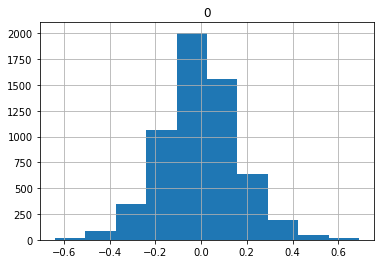

In [59]:
pd.DataFrame((data['all_li_mig_16'] - data['all_li_mig_10']).values).hist()

In [60]:
list(data.columns)

['NAME',
 'county',
 'hh_00',
 'hh_16',
 'hh_16_moe',
 'hh_90',
 'hi_00',
 'hi_16',
 'hi_16_moe',
 'hi_90',
 'hi_mig_10',
 'hi_mig_10_moe',
 'hi_mig_16',
 'hi_mig_16_moe',
 'hinc_00',
 'hinc_16',
 'hinc_16_moe',
 'hinc_90',
 'hu_00',
 'hu_16',
 'hu_16_moe',
 'hu_90',
 'li_00',
 'li_16',
 'li_16_moe',
 'li_90',
 'li_mig_10',
 'li_mig_10_moe',
 'li_mig_16',
 'li_mig_16_moe',
 'mhi_00',
 'mhi_16',
 'mhi_16_moe',
 'mhi_90',
 'mhi_mig_10',
 'mhi_mig_10_moe',
 'mhi_mig_16',
 'mhi_mig_16_moe',
 'mhval_00',
 'mhval_16',
 'mhval_16_moe',
 'mhval_90',
 'mi_00',
 'mi_16',
 'mi_16_moe',
 'mi_90',
 'mi_mig_10',
 'mi_mig_10_moe',
 'mi_mig_16',
 'mi_mig_16_moe',
 'mrent_00',
 'mrent_16',
 'mrent_16_moe',
 'mrent_90',
 'per_all_li_mig_10',
 'per_all_li_mig_16',
 'per_asian_00',
 'per_asian_16',
 'per_asian_16_moe',
 'per_asian_90',
 'per_black_00',
 'per_black_16',
 'per_black_16_moe',
 'per_black_90',
 'per_built_00_16',
 'per_built_80_90',
 'per_built_90_00',
 'per_burden_00',
 'per_burden_16',
 'pe

In [64]:
data[['vli_90','li_90','mi_90','mhi_90','hi_90','vhi_90']].sum(axis=1).head()

34001000100    1.0
34001000200    1.0
34001000300    1.0
34001000400    1.0
34001000500    1.0
dtype: float64

In [65]:
data[['vli_00','li_00','mi_00','mhi_00','hi_00','vhi_00']].sum(axis=1).head()

34001000100    1.0
34001000200    1.0
34001000300    1.0
34001000400    1.0
34001000500    1.0
dtype: float64

In [66]:
data[['vli_16','li_16','mi_16','mhi_16','hi_16','vhi_16']].sum(axis=1).head()

34001000100    1.0
34001000200    1.0
34001000300    1.0
34001000400    1.0
34001000500    1.0
dtype: float64

In [53]:
l=[]
for i in list(data.columns):
    if i[-3:]=='moe':
       l.append(i) 

In [92]:
l[0]

'hh_16_moe'

In [117]:
l[0][:-4]

'hh_16'

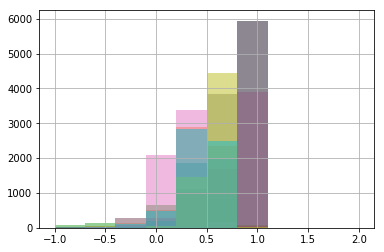

In [146]:
lim=(-1,2)
for i in range(0,10):
    (data[l[i][:-4]]+.000001-data[l[i]]+.0000001).divide(data[l[i][:-4]]+0.0000001).hist(range=lim, alpha=0.5)

In [144]:
len(l)

36

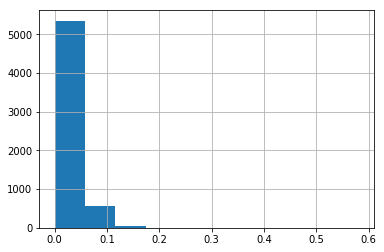

In [70]:
data[l[2]].hist()

In [91]:
data[l[3]]

GEOid2
34001000100    0.024949
34001000200    0.078308
34001000300    0.024079
34001000400    0.047312
34001000500    0.021373
34001001100    0.066204
34001001200    0.019599
34001001300    0.032153
34001001400    0.030972
34001001500    0.028552
34001001900    0.063676
34001002300    0.023169
34001002400    0.088382
34001002500    0.029848
34001010101    0.061743
34001010102    0.062745
34001010200    0.048304
34001010300    0.034997
34001010401    0.056084
34001010403    0.043514
34001010501    0.040478
34001010503    0.038206
34001010600    0.042731
34001010700    0.066556
34001010800    0.046007
34001010900    0.053899
34001011000    0.055971
34001011100    0.043037
34001011201    0.041868
34001011202    0.044808
                 ...   
9013528100     0.000000
9013529100     0.000000
9013530100     0.000000
9013530200     0.000000
9013530301     0.000000
9013530302     0.000000
9013530400     0.000000
9013530500     0.000000
9013530600     0.000000
9013533101     0.000000
901353310

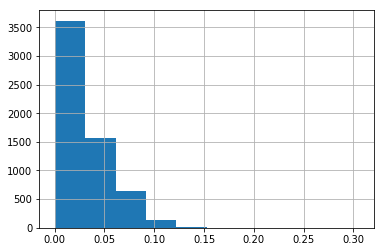

In [73]:
data[l[3]].hist()

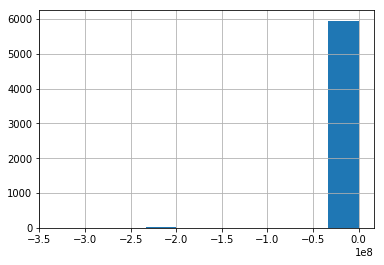

In [88]:
data[l[4]].hist()

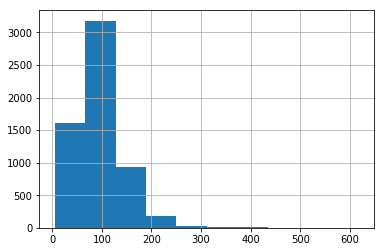

In [90]:
data[l[5]].hist()

In [ ]:
data[l[4]].hist